In [50]:
from Game import *

In [51]:
def initial_state():
    state = Board(4,4)
    
    for i in range(16):
        state[i] = 1
        
    return state

In [52]:
def valid_moves(state,player):
    moves = []
    for location in range(16):
        if state[location] == 1:
            moves.append(location)
            
    return moves

In [53]:
state = initial_state()
valid_moves(state,1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [54]:
def show_state(state):
    print(state)

In [55]:
def update_state(state,player,move):
    new_state=state
    r_start,c_start = state.rc_from_index(move)
    for c in range(c_start,4):
        for r in range(r_start,4):
        
            
            new_state[r,c]=0
            
    return new_state

In [56]:
def win_status(state,player):
    if state[0] == 0:
        return "lose"

In [57]:
def human_move(state,player):
    
    state.show_locations()
    print("Player",player)
    move=int(input("Which square to move?"))
    return move

human_agent=Agent(human_move)

In [58]:
from Game.minimax import *
def minimax_move(state,player):
    
    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)

minimax_agent=Agent(minimax_move)

In [59]:
def random_move(state,player):
    
    move=random.choice(valid_moves(state,player))
    return move

random_agent=Agent(random_move)

In [60]:
def skittles_move(state,player,info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=2  # initial number of skittles
    
    move=weighted_choice(T[state])
    
    if move is None:  
        
        # learn
        if learning:
            if last_state:
                T[last_state][last_action]-=1 # take away a skittle
                if T[last_state][last_action]<0:
                    T[last_state][last_action]=0
    
        return random_move(state,player)
    else:
        return move

In [61]:
def skittles_after(status,player,info):
    # not return anything but...
    # will adjust the skittles table if lost the game
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    if learning:
        if status=='lose':  # only learn when you lose
            T[last_state][last_action]-=1 # take away a skittle
            if T[last_state][last_action]<0:
                T[last_state][last_action]=0


In [62]:
skittles_agent=Agent(skittles_move)
skittles_agent.post=skittles_after
skittles_agent.T=Table()  # makes an empty table
skittles_agent.learning=True

In [69]:
g=Game()
g.run(random_agent,random_agent)

====
Game  1
 1  1  1  1 
 1  1  1  1 
 1  1  1  1 
 1  1  1  1 

Player 1 moves 15
 1  1  1  1 
 1  1  1  1 
 1  1  1  1 
 1  1  1  0 

Player 2 moves 7
 1  1  1  1 
 1  1  1  0 
 1  1  1  0 
 1  1  1  0 

Player 1 moves 0
 1  1  1  1 
 1  1  1  0 
 1  1  1  0 
 1  1  1  0 

Player  2 won.


[2]

In [70]:
N_train=5
N_test=5

percentage_player1_wins=[]
percentage_player2_wins=[]
percentage_ties=[]
total_number_of_games=[]

current_game_number=0

for i in range(1):
    
    skittles_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    g.run(random_agent,minimax_agent)

    current_game_number+=N_train
    
    
    skittles_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    results=g.run(random_agent,minimax_agent)
    
    percentage_player1_wins.append(results.count(1))
    percentage_player2_wins.append(results.count(2))
    percentage_ties.append(results.count(0)) 
    total_number_of_games.append(current_game_number)

In [71]:
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib.pylab import figure,plot,legend,xlabel,ylabel

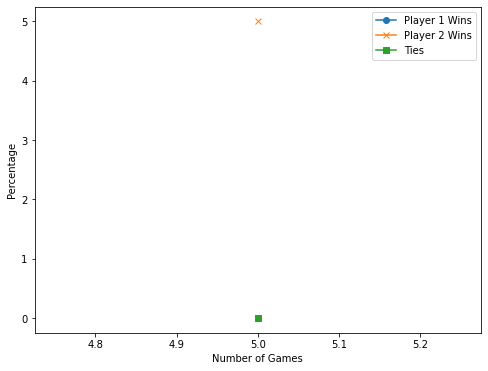

In [72]:
figure(figsize=(8,6))
plot(total_number_of_games,percentage_player1_wins,'-o',label="Player 1 Wins")
plot(total_number_of_games,percentage_player2_wins,'-x',label="Player 2 Wins")
plot(total_number_of_games,percentage_ties,'-s',label="Ties")
xlabel('Number of Games')
ylabel('Percentage')
legend()

In [73]:
skittles_agent.T

{}

In [76]:
skittles_agent.learning=True
g=Game(number_of_games=25)
g.display=False
results=g.run(random_agent,rand_agent)
results

[2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1]